In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [4]:
df=pd.read_csv("Copy of Wholesale customers data.csv")

In [5]:
df.shape

(440, 8)

In [6]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [7]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [8]:
df=df.drop_duplicates()

In [9]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [10]:
df.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

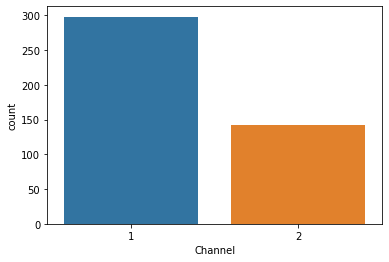

In [11]:
sns.countplot(x="Channel",data=df)
plt.show()

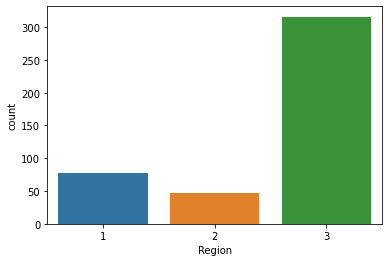

In [12]:
sns.countplot(x="Region",data=df)
plt.show()

In [13]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 19.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


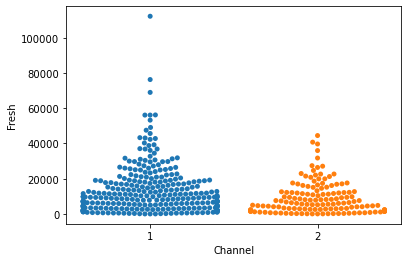

In [14]:
sns.swarmplot(x="Channel",y="Fresh",data=df)
plt.show()

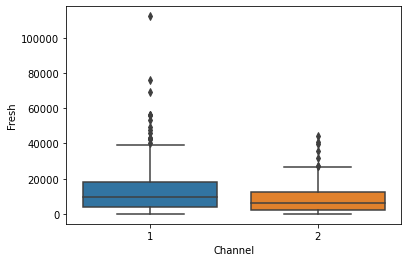

In [15]:
sns.boxplot(x="Channel",y="Fresh",data=df)
plt.show()

In [16]:
df["Fresh"].quantile(0.25)

3127.75

In [17]:
df["Fresh"].quantile(0.50)

8504.0

In [18]:
df["Fresh"].quantile(0.75)

16933.75

In [19]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [20]:
x=df[["Fresh","Milk"]]

In [21]:
from sklearn.cluster import KMeans

In [22]:
model=KMeans(n_clusters=6)
model.fit(x)

KMeans(n_clusters=6)

In [23]:
x["cluster"]=model.predict(x)

<ipython-input-23-17ed5d468ef9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["cluster"]=model.predict(x)


In [24]:
sum_distance=[]
k=range(1,20)
for i in k:
    km=KMeans(n_clusters=i)
    km=km.fit(x)
    sum_distance.append(km.inertia_)
    

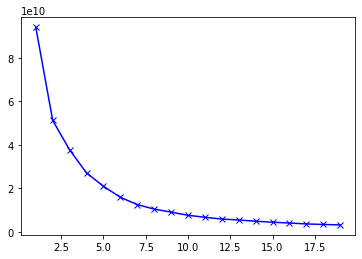

In [25]:
plt.plot(k,sum_distance,'bx-')
plt.show()

In [26]:
model.cluster_centers_
cen=model.cluster_centers_
cen

array([[ 4626.96774194,  3628.55760369],
       [38724.36363636,  5131.87878788],
       [17727.48837209,  3512.65116279],
       [30445.        , 48782.66666667],
       [85779.66666667, 12503.66666667],
       [ 5217.69230769, 15582.09615385]])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


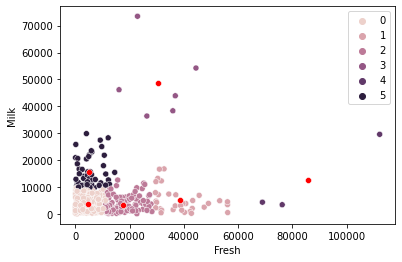

In [27]:
sns.scatterplot(x="Fresh",y="Milk",hue="cluster",data=x)
sns.scatterplot(cen[:,0],cen[:,1],color='red')
plt.show()

In [28]:
df.columns
df2=df[['Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']]

In [29]:
sum_distance=[]
k=range(1,20)
for i in k:
    km=KMeans(n_clusters=i)
    km=km.fit(df2)
    sum_distance.append(km.inertia_)

In [30]:
sum_distance

[157595857165.60883,
 113217528520.90987,
 80342166920.9407,
 64855545528.21104,
 53091562444.7946,
 46774258816.04788,
 41171504681.16353,
 36287047175.02926,
 32777269010.534172,
 30147804145.156597,
 27606729573.52795,
 26030280825.99585,
 24889613879.652092,
 23268022300.107437,
 21428924299.6164,
 20014863865.873062,
 19077550144.998295,
 17574778037.768715,
 17019063158.370846]

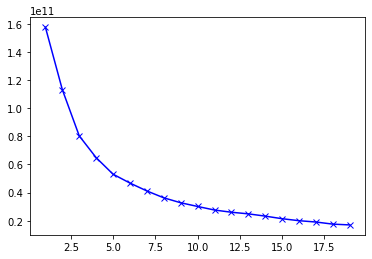

In [31]:
plt.plot(k,sum_distance,'bx-')
plt.show()

In [32]:
algo=KMeans(n_clusters=6)
algo.fit(df2)


KMeans(n_clusters=6)

In [33]:
df2["cluster"]=algo.predict(df2)

<ipython-input-33-08fb54044b29>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["cluster"]=algo.predict(df2)


In [34]:
df2

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,3
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,3
436,39228,1431,764,4510,93,2346,1
437,14531,15488,30243,437,14841,1867,5
438,10290,1981,2232,1038,168,2125,0
